# IRIS SSP tas


This example uses IRIS to calculate and plot globle average temeprature trend for SSP585 future senario.

In this notebook we demonstrate:

- Use IRIS to load data  
- Use IRIS to calculate weighted global average
- Use IRIS to calculate annual average

The following material uses Coupled Model Intercomparison Project (CMIP6) collections. The CMIP6 terms of use are found[here](https://pcmdi.llnl.gov/CMIP6/TermsOfUse/TermsOfUse6-1.html). For more information on the collection, please click [here]( https://geonetwork.nci.org.au/geonetwork/srv/eng/catalog.search#/metadata/f6600_2266_8675_3563).

---


- Authors:  virtual research environment team at NCI
- Keywords: CMIP6, IRIS
- Software: Python, IRIS
- Create Date: 2020-Aug
---

In [1]:
import iris

In [2]:
!ls /g/data/oi10/replicas/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM-CM6-1/ssp585/r1i1p1f2/Amon/tas/gr/v20190219/

tas_Amon_CNRM-CM6-1_ssp585_r1i1p1f2_gr_201501-210012.nc


### Load data

In [3]:
file='/g/data/oi10/replicas/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM-CM6-1/ssp585/r1i1p1f2/Amon/tas/gr/v20190219/tas_Amon_CNRM-CM6-1_ssp585_r1i1p1f2_gr_201501-210012.nc'
cube=iris.load_cube(file, 'air_temperature')
print(cube)

air_temperature / (K)               (time: 1032; latitude: 128; longitude: 256)
     Dimension coordinates:
          time                           x               -               -
          latitude                       -               x               -
          longitude                      -               -               x
     Scalar coordinates:
          height: 2.0 m
     Attributes:
          CMIP6_CV_version: cv=6.2.3.0-7-g2019642
          Conventions: CF-1.7 CMIP-6.2
          EXPID: CNRM-CM6-1_ssp585_r1i1p1f2
          activity_id: ScenarioMIP
          arpege_minor_version: 6.3.2
          branch_method: standard
          branch_time_in_child: 60265.0
          branch_time_in_parent: 60265.0
          contact: contact.cmip@meteo.fr
          creation_date: 2018-11-15T10:50:50Z
          data_specs_version: 01.00.21
          description: Near-Surface Air Temperature
          dr2xml_md5sum: c2dce418e78ca835be1e2ff817c2c403
          dr2xml_version: 1.16
          exp

/g/data/dk92/apps/anaconda3/2020.12/envs/NCI-data-analysis/lib/python3.7/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


In [12]:
#Alternatively, IRIS can access data from thredds
#url="http://dapds00.nci.org.au/thredds/dodsC/ua6_4/CMIP5/derived/CMIP5/GCM/regional/ENSEMBLE/P10/rcp85/mon/atmos/Amon/r1i1p1/v20140516/tas/seasavg-timeseries-abs-change-g-nrm/tas_Amon_P10_rcp85_r1i1p1_2006-209911-abs-change-wrt-1950-2005-seasavg-timeseries_native_g-nrm.nc"
#cube = iris.load( "http://dapds00.nci.org.au/thredds/wcs/ua6_4/CMIP5/derived/CMIP5/GCM/regional/ENSEMBLE/P10/rcp85/mon/atmos/Amon/r1i1p1/v20140516/tas/seasavg-timeseries-abs-change-g-nrm" )

### Calculate data

In [4]:
# add 'clim_year' to store annual data
import iris.coord_categorisation
cube_year=iris.coord_categorisation.add_year(cube, 'time', name='clim_year')
print(cube)

air_temperature / (K)               (time: 1032; latitude: 128; longitude: 256)
     Dimension coordinates:
          time                           x               -               -
          latitude                       -               x               -
          longitude                      -               -               x
     Auxiliary coordinates:
          clim_year                      x               -               -
     Scalar coordinates:
          height: 2.0 m
     Attributes:
          CMIP6_CV_version: cv=6.2.3.0-7-g2019642
          Conventions: CF-1.7 CMIP-6.2
          EXPID: CNRM-CM6-1_ssp585_r1i1p1f2
          activity_id: ScenarioMIP
          arpege_minor_version: 6.3.2
          branch_method: standard
          branch_time_in_child: 60265.0
          branch_time_in_parent: 60265.0
          contact: contact.cmip@meteo.fr
          creation_date: 2018-11-15T10:50:50Z
          data_specs_version: 01.00.21
          description: Near-Surface Air Temperature

In [5]:
# Calcuolate global average
import iris.analysis.cartography
cube.coord('latitude').guess_bounds()
cube.coord('longitude').guess_bounds()
grid_areas = iris.analysis.cartography.area_weights(cube)
global_mean_cube = cube.collapsed(['longitude', 'latitude'], iris.analysis.MEAN, weights=grid_areas)
print(global_mean_cube)

/g/data/dk92/apps/anaconda3/2020.12/envs/NCI-data-analysis/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


air_temperature / (K)               (time: 1032)
     Dimension coordinates:
          time                           x
     Auxiliary coordinates:
          clim_year                      x
     Scalar coordinates:
          height: 2.0 m
          latitude: 0.0 degrees, bound=(-89.62225042184065, 89.62225042184065) degrees
          longitude: 179.296875 degrees, bound=(-0.703125, 359.296875) degrees
     Attributes:
          CMIP6_CV_version: cv=6.2.3.0-7-g2019642
          Conventions: CF-1.7 CMIP-6.2
          EXPID: CNRM-CM6-1_ssp585_r1i1p1f2
          activity_id: ScenarioMIP
          arpege_minor_version: 6.3.2
          branch_method: standard
          branch_time_in_child: 60265.0
          branch_time_in_parent: 60265.0
          contact: contact.cmip@meteo.fr
          creation_date: 2018-11-15T10:50:50Z
          data_specs_version: 01.00.21
          description: Near-Surface Air Temperature
          dr2xml_md5sum: c2dce418e78ca835be1e2ff817c2c403
          dr2xml_ver

In [6]:
# Calculate annual average
annual_mean = global_mean_cube.aggregated_by(['clim_year'], iris.analysis.MEAN)
print(annual_mean)

air_temperature / (K)               (time: 86)
     Dimension coordinates:
          time                           x
     Auxiliary coordinates:
          clim_year                      x
     Scalar coordinates:
          height: 2.0 m
          latitude: 0.0 degrees, bound=(-89.62225042184065, 89.62225042184065) degrees
          longitude: 179.296875 degrees, bound=(-0.703125, 359.296875) degrees
     Attributes:
          CMIP6_CV_version: cv=6.2.3.0-7-g2019642
          Conventions: CF-1.7 CMIP-6.2
          EXPID: CNRM-CM6-1_ssp585_r1i1p1f2
          activity_id: ScenarioMIP
          arpege_minor_version: 6.3.2
          branch_method: standard
          branch_time_in_child: 60265.0
          branch_time_in_parent: 60265.0
          contact: contact.cmip@meteo.fr
          creation_date: 2018-11-15T10:50:50Z
          data_specs_version: 01.00.21
          description: Near-Surface Air Temperature
          dr2xml_md5sum: c2dce418e78ca835be1e2ff817c2c403
          dr2xml_versi

### Plotting

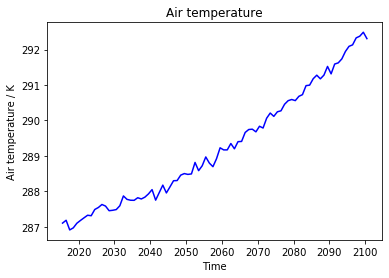

In [8]:
import iris.quickplot as qplt
%matplotlib inline
qplt.plot(annual_mean, label='ssp585 scenario', lw=1.5, color='blue')